# HW1 - Phase 2 - Parsa Daghigh
----
## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
file_path = "farzaneh_task1_2025-04-19_08h45.15.478.csv"
df = pd.read_csv(file_path)

In [ ]:
df

,thisRow.t,notes,folder,feature,morph_level,response_key,rt,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 13
0,NaN,NaN,app,9,9,left,2.818644,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
1,NaN,NaN,app,9,59,right,1.285378,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
2,NaN,NaN,app,9,9,left,1.973813,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
3,NaN,NaN,app,9,49,right,1.176375,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
4,NaN,NaN,app,9,9,left,0.764893,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,sha,19,79,right,0.115666,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
396,NaN,NaN,sha,19,79,right,0.142672,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
397,NaN,NaN,sha,19,99,right,0.234086,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN
398,NaN,NaN,sha,19,9,left,0.102025,farzaneh,1,2025-04-19_08h45.15.478,task1,2021.2.3,60.076766,NaN


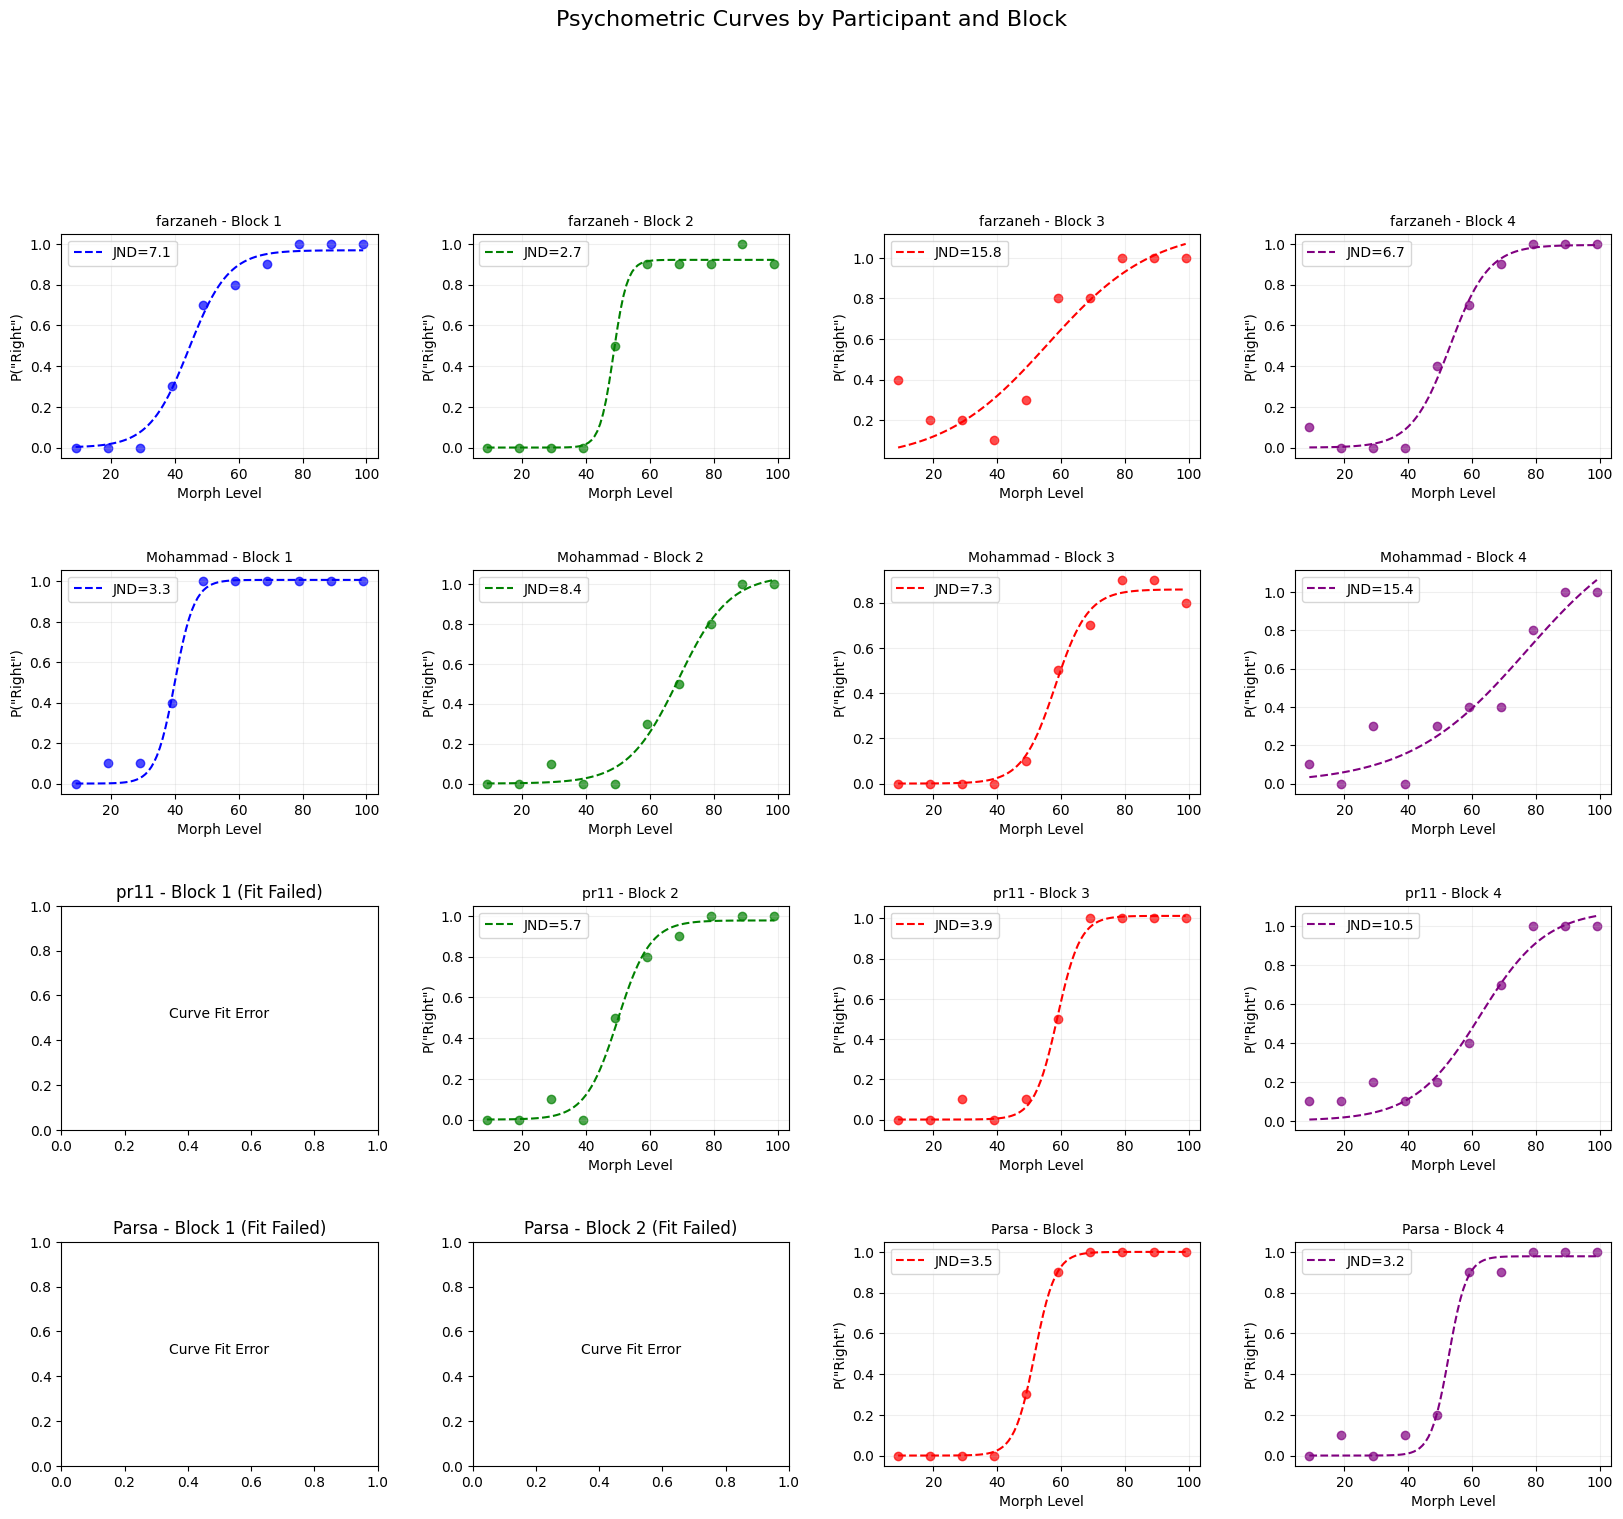

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, a, x0, b):
    return a / (1 + np.exp(-b * (x - x0)))

csv_files = [
    'farzaneh_task1_2025-04-19_08h45.15.478.csv',
    'Mohammad_task1_2025-04-19_08h22.56.355.csv',
    'pr11_task1_2025-04-19_08h02.08.565.csv',
    'Parsa_task1_2025-04-19_09h15.41.540.csv'
]

# Create a 4x4 grid of plots (one row per participant)
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
colors = ['blue', 'green', 'red', 'purple']

for p_idx, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df['response'] = np.where(df['response_key'] == 'right', 1, 0)

    # Split into 4 blocks (0-100, 101-200, etc.)
    df['block'] = df.index // 100

    for b_idx in range(4):
        ax = axes[p_idx, b_idx]
        block_data = df[df['block'] == b_idx]

        # Aggregate responses by morph level
        morph_levels = sorted(block_data['morph_level'].unique())
        mean_response = [block_data[block_data['morph_level'] == m]['response'].mean()
                        for m in morph_levels]

        # Fit sigmoid curve
        try:
            popt, _ = curve_fit(sigmoid, morph_levels, mean_response,
                              p0=[1, np.mean(morph_levels), 0.1], maxfev=10000)
            x_fit = np.linspace(min(morph_levels), max(morph_levels), 100)
            y_fit = sigmoid(x_fit, *popt)

            # Calculate JND
            def inverse_sigmoid(y, a, x0, b):
                return x0 - np.log(a/y - 1)/b
            JND = (inverse_sigmoid(0.75, *popt) - inverse_sigmoid(0.25, *popt))/2

            # Plot
            ax.scatter(morph_levels, mean_response, color=colors[b_idx], alpha=0.7)
            ax.plot(x_fit, y_fit, color=colors[b_idx], linestyle='--',
                   label=f'JND={JND:.1f}')
            ax.set_title(f'{file.split("_")[0]} - Block {b_idx+1}', fontsize=10)
            ax.set_xlabel('Morph Level')
            ax.set_ylabel('P("Right")')
            ax.legend()
            ax.grid(alpha=0.2)

        except RuntimeError:
            ax.set_title(f'{file.split("_")[0]} - Block {b_idx+1} (Fit Failed)')
            ax.text(0.5, 0.5, 'Curve Fit Error', ha='center')

plt.suptitle('Psychometric Curves by Participant and Block', fontsize=16, y=1.02)
plt.savefig('all_participants_blocks.png', dpi=300, bbox_inches='tight')
plt.show()

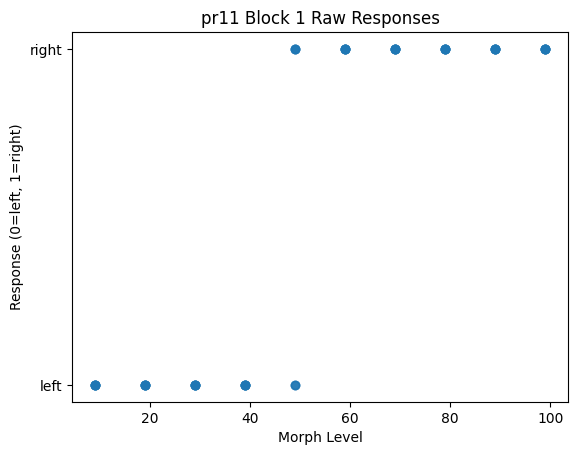

In [ ]:
plt.scatter(block1['morph_level'], block1['response_key'], alpha=0.5)
plt.title('pr11 Block 1 Raw Responses')
plt.xlabel('Morph Level')
plt.ylabel('Response (0=left, 1=right)')
plt.show()

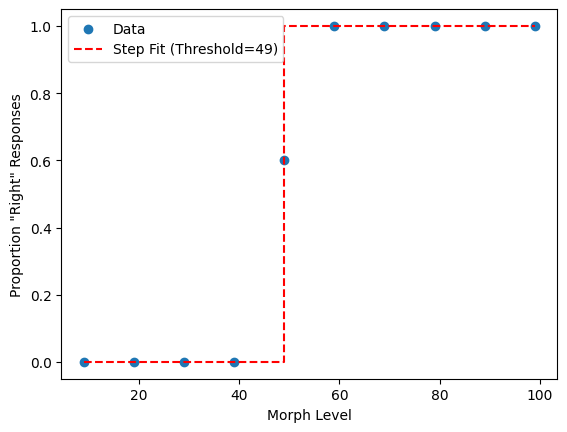

In [ ]:
morph_levels = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
mean_response = [0, 0, 0, 0, 0.6, 1, 1, 1, 1, 1]  # From my counts

def step_function(x, threshold):
    return np.array(x) >= threshold
threshold = morph_levels[np.argmax(np.array(mean_response) > 0.5)]

# Plot
plt.scatter(morph_levels, mean_response, label='Data')
plt.step(morph_levels, step_function(morph_levels, threshold),
         where='post', color='red', linestyle='--', label=f'Step Fit (Threshold={threshold})')
plt.xlabel('Morph Level')
plt.ylabel('Proportion "Right" Responses')
plt.legend()
plt.show()

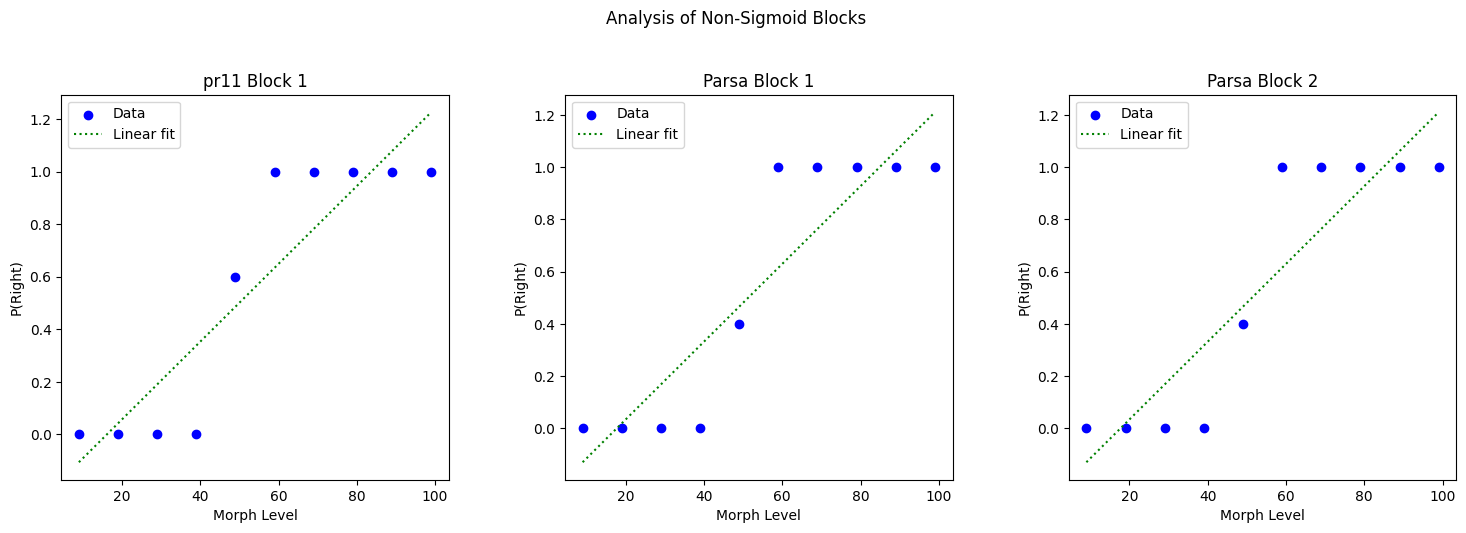

In [ ]:
# List of problematic blocks
problematic_blocks = [
    ('pr11_task1_2025-04-19_08h02.08.565.csv', 0),  # pr11 Block 1
    ('Parsa_task1_2025-04-19_09h15.41.540.csv', 0),  # Parsa Block 1
    ('Parsa_task1_2025-04-19_09h15.41.540.csv', 1)   # Parsa Block 2
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.3)

for idx, (file, block_idx) in enumerate(problematic_blocks):
    ax = axes[idx]
    df = pd.read_csv(file)

    df['response'] = np.where(df['response_key'] == 'right', 1, 0)

    block_data = df.iloc[block_idx*100 : (block_idx+1)*100]
    morph_levels = sorted(block_data['morph_level'].unique())
    mean_response = [block_data[block_data['morph_level'] == m]['response'].mean()
                     for m in morph_levels]

    # Plot raw data
    ax.scatter(morph_levels, mean_response, color='blue', label='Data')

    # Case 1: Step function (0% → 100% transition)
    if np.all(np.isin(mean_response, [0, 1])):
        threshold = morph_levels[np.argmax(np.array(mean_response) > 0.5)]
        ax.step(morph_levels, np.array(mean_response) >= threshold,
                'r--', label=f'Step at {threshold}')

    # Case 2: No variation (all 0 or all 1)
    elif len(np.unique(mean_response)) == 1:
        ax.text(0.5, 0.5, f'Constant: {mean_response[0]}',
                ha='center', color='red')

    # Case 3: Other patterns (e.g., linear)
    else:
        slope, intercept, _, _, _ = linregress(morph_levels, mean_response)
        ax.plot(morph_levels, intercept + slope * np.array(morph_levels),
                'g:', label='Linear fit')

    ax.set_title(f"{file.split('_')[0]} Block {block_idx+1}")
    ax.set_xlabel('Morph Level')
    ax.set_ylabel('P(Right)')
    ax.legend()

plt.suptitle('Analysis of Non-Sigmoid Blocks', y=1.05)
plt.show()